# Mesterséges neurális hálózat

Az adatsorok elérhetőek innen:

Energia: https://data.open-power-system-data.org/time_series/2020-10-06



*   HU_load_actual_entsoe_transparency;	number;	Total load in Hungary in MW as published on ENTSO-E Transparency Platform;	own calculation based on ENTSO-E Transparency
*   HU_load_forecast_entsoe_transparency;	number;	Day-ahead load forecast in Hungary in MW as published on ENTSO-E Transparency Platform;	own calculation based on ENTSO-E Transparency
*   HU_solar_generation_actual;	number;	Actual solar generation in Hungary in MW;	own calculation based on ENTSO-E Transparency
*   HU_wind_onshore_generation_actual;	number;	Actual wind_onshore generation in Hungary in MW;	own calculation based on ENTSO-E Transparency

Időjárás: https://data.open-power-system-data.org/weather_data/

*   HU_temperature;	number (float);	temperature weather variable for HU in degrees C
*   HU_radiation_direct_horizontal;	number (float);	radiation_direct_horizontal weather variable for HU in W/m2
*   HU_radiation_diffuse_horizontal;	number (float); radiation_diffuse_horizontal weather variable for HU in W/m2



## 0 - Könyvtárak betöltése / Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 1 - Adatok betöltése

In [2]:
df = pd.read_excel('Train.xlsx')
df.head()

,AT,V,AP,RH,PE
0,10.54,34.03,1018.71,74.00,478.77
1,7.08,39.99,1010.55,91.44,482.83
2,14.49,41.16,1000.50,82.17,465.24
3,10.73,25.36,1009.35,100.15,469.43
4,22.88,63.91,1009.63,87.82,442.50


In [3]:
df.tail()

,AT,V,AP,RH,PE
8563,17.10,49.69,1005.53,81.82,457.32
8564,24.73,65.34,1015.42,52.80,446.92
8565,30.44,56.24,1005.19,56.24,429.34
8566,23.00,66.05,1020.61,80.29,421.57
8567,17.75,49.25,1020.86,63.67,454.41


### Az adatsor felosztása training és test halmazra / Splitting the dataset into the Training set and Test set

In [4]:
df.iloc[:,-1] #ez lesz a train y

0       478.77
1       482.83
2       465.24
3       469.43
4       442.50
         ...  
8563    457.32
8564    446.92
8565    429.34
8566    421.57
8567    454.41
Name: PE, Length: 8568, dtype: float64

In [5]:
df.iloc[:,:-1] #ez lesz a train x

,AT,V,AP,RH
0,10.54,34.03,1018.71,74.00
1,7.08,39.99,1010.55,91.44
2,14.49,41.16,1000.50,82.17
3,10.73,25.36,1009.35,100.15
4,22.88,63.91,1009.63,87.82
...,...,...,...,...
8563,17.10,49.69,1005.53,81.82
8564,24.73,65.34,1015.42,52.80
8565,30.44,56.24,1005.19,56.24
8566,23.00,66.05,1020.61,80.29


In [6]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [8]:
X_train.shape

(6854, 4)

In [9]:
X_test.shape

(1714, 4)

A felosztáshoz az sklearn programcsomag megfelelő függvényét fogjuk használni.
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

A neurális hálózatok esetében skálázzuk az adatokat!

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train_sc = X_train
X_test_sc = X_test
X_train_sc[:,:-1] = sc.fit_transform(X_train[:,:-1])
X_test_sc[:,:-1] = sc.transform(X_test[:,:-1])

sc_y = StandardScaler()
y_train_sc = sc_y.fit_transform(y_train.reshape(len(y_train), 1))
y_test_sc = sc_y.transform(y_test.reshape(len(y_test), 1))


## 2 - Creating Sklearn neural network - a háló létrehozása Scikit learn könyvtárban

https://scikit-learn.org/stable/modules/neural_networks_supervised.html

https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor



In [12]:
from sklearn.neural_network import MLPRegressor

Activation functions: ['identity', 'logistic', 'relu', 'softmax', 'tanh']

In [44]:
ne = MLPRegressor(hidden_layer_sizes=(100), activation='tanh', solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', 
 learning_rate_init=0.001, power_t=0.5, max_iter=1000, shuffle=True, random_state=None, 
 tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, 
 validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000)
ne.fit(X_train_sc,y_train_sc)
print(ne.score(X_train_sc,y_train_sc))
print(ne.score(X_test_sc,y_test_sc))


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9349731232673153
0.9450604294390538


In [14]:
ne = MLPRegressor(hidden_layer_sizes=(100,20), activation='tanh', solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', 
 learning_rate_init=0.001, power_t=0.5, max_iter=1000, shuffle=True, random_state=None, 
 tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, 
 validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000)
ne.fit(X_train_sc,y_train_sc)
print(ne.score(X_train_sc,y_train_sc))
print(ne.score(X_test_sc,y_test_sc))

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9374257490053097
0.946435696261662


In [48]:
ne = MLPRegressor(hidden_layer_sizes=(100,40), activation='tanh', solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', 
 learning_rate_init=0.001, power_t=0.5, max_iter=1000, shuffle=True, random_state=None, 
 tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, 
 validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000)
ne.fit(X_train_sc,y_train_sc)
print(ne.score(X_train_sc,y_train_sc))
print(ne.score(X_test_sc,y_test_sc))

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9360740690692145
0.9455777807728233


In [46]:
ne = MLPRegressor(hidden_layer_sizes=(100,40), activation='relu', solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', 
 learning_rate_init=0.001, power_t=0.5, max_iter=1000, shuffle=True, random_state=None, 
 tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, 
 validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000)
ne.fit(X_train_sc,y_train_sc)
print(ne.score(X_train_sc,y_train_sc))
print(ne.score(X_test_sc,y_test_sc))

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9251035165857475
0.9357623889438984


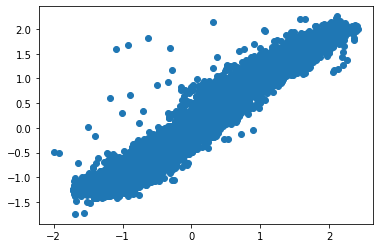

In [49]:
y_train_predict_sc = ne.predict(X_train_sc)
plt.scatter(y_train_sc,y_train_predict_sc) 
plt.show()

## 3 - Creating TensorFlow neural network - a háló létrehozása

A TensorFlow neurális hálózat modelljét fogjuk használni. Ezt a könyvtárat használják a Google és sok más nagy techcég munkatársai is.

In [20]:
import tensorflow as tf


### Inícializáljuk az ANN-t. 

In [21]:
ann = tf.keras.Sequential()

Bemeneti réteg és az első rejtett réteg.

https://keras.io/api/layers/activations/


### 1. Bemeneti réteg és első rejtett réteg / Input and first hidden layer

A bemeneti rétegben lévő neuronok számát nem kell megadnunk, azt a változól számából a modell automatikusan meghatározza.

Gyakori aktiválási függvények: relu, sigmoid, linear

https://www.tensorflow.org/api_docs/python/tf/keras/activations


In [22]:
ann.add(tf.keras.layers.Dense(units=5, activation='sigmoid',name='Rejtett1'))

### 2. Második rejtett réteg hozzáadása

In [23]:
ann.add(tf.keras.layers.Dense(units=5, activation='relu',name='Rejtett2'))

### 3. Kimeneti réteg hozzáadása

In [24]:
ann.add(tf.keras.layers.Dense(units=1,name='Kimenet'))

### 4. Training TensorFlow neural network - A létrehozott háló tanítása

https://www.tensorflow.org/tutorials/keras/classification



Compiler meghatározása - Compiling the ANN

https://www.tensorflow.org/api_docs/python/tf/keras/losses



In [25]:
ann.compile(optimizer='adam',
              loss='mean_squared_error')

Tanítás a training set-en

In [26]:
res = ann.fit(X_train_sc, y_train_sc,validation_data=(X_test_sc, y_test_sc), epochs=100) #a teszt adatokat adtuk meg validálási változóként, ami csalás!!!!

Epoch 1/100
215/215 [==============================] - 1s 2ms/step - loss: 0.9980 - val_loss: 0.9614
Epoch 2/100
215/215 [==============================] - 0s 2ms/step - loss: 0.7092 - val_loss: 0.3970
Epoch 3/100
215/215 [==============================] - 0s 2ms/step - loss: 0.1726 - val_loss: 0.0965
Epoch 4/100
215/215 [==============================] - 0s 2ms/step - loss: 0.0909 - val_loss: 0.0787
Epoch 5/100
215/215 [==============================] - 0s 2ms/step - loss: 0.0786 - val_loss: 0.0673
Epoch 6/100
215/215 [==============================] - 0s 2ms/step - loss: 0.0721 - val_loss: 0.0644
Epoch 7/100
215/215 [==============================] - 0s 2ms/step - loss: 0.0695 - val_loss: 0.0610
Epoch 8/100
215/215 [==============================] - 0s 2ms/step - loss: 0.0679 - val_loss: 0.0610
Epoch 9/100
215/215 [==============================] - 0s 2ms/step - loss: 0.0674 - val_loss: 0.0656
Epoch 10/100
215/215 [==============================] - 0s 2ms/step - loss: 0.0678 - val_lo

Értékeljük ki a modellt

In [ ]:
res.history

{'loss': [1.0053918361663818,
  0.8766778707504272,
  0.7860039472579956,
  0.6821101307868958,
  0.5618384480476379,
  0.43381693959236145,
  0.31465956568717957,
  0.21629932522773743,
  0.1473153531551361,
  0.10905873030424118,
  0.09197177737951279,
  0.08416041731834412,
  0.08004294335842133,
  0.07768670469522476,
  0.07573633641004562,
  0.07454024255275726,
  0.07354488968849182,
  0.07243318855762482,
  0.07183335721492767,
  0.07125634700059891,
  0.07077208161354065,
  0.07012461125850677,
  0.06957761943340302,
  0.06945807486772537,
  0.06866233050823212,
  0.0683673545718193,
  0.06787944585084915,
  0.06751909106969833,
  0.06719285994768143,
  0.0669790580868721,
  0.06633773446083069,
  0.06616703420877457,
  0.0655333399772644,
  0.06558172404766083,
  0.06540819257497787,
  0.06486722826957703,
  0.06469259411096573,
  0.06451187282800674,
  0.0645218938589096,
  0.06406988948583603,
  0.06367459893226624,
  0.06337038427591324,
  0.06312631815671921,
  0.062964618

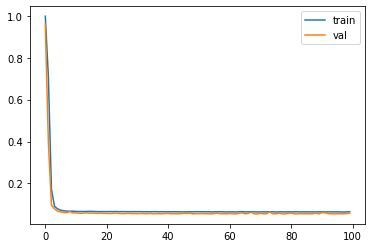

In [27]:
plt.plot(np.arange(len(res.history['loss'])),res.history['loss'],label='train')
plt.plot(np.arange(len(res.history['loss'])),res.history['val_loss'],label='val')
plt.legend()
plt.show()

Vizualizáljuk a hálót!

https://www.tensorflow.org/api_docs/python/tf/keras/utils/plot_model



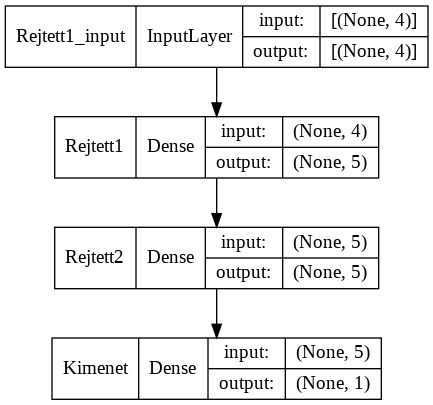

In [28]:
tf.keras.utils.plot_model(
    ann, to_file='model.png', show_shapes=True, show_dtype=False,
    show_layer_names=True)

## 4 - Érzékenységvizsgálat a modellekkel

A modellek lehetőséget adnak, hogy megvizsgáljuk az egyes paraméterek hatását a kimenetre, illetve adott esetben olyan bemeneti adatok hatását is képesek predikálni, amik nem szerepeltek a tanítási mintában (természetesen ilyenkor az eredményeket megfelelő *mérnöki* kritikával kell fogadni).

Esetünkben rögzítsük le a tanítási mintában lévő változók átlagát egy X0 vektorba! Ezt követően megnézzük, hogy egy éppen vizsgált "var" változó milyen tartományban mozog a tanítási mintában, majd ebben a tartományban változtassunk csak ennek a változónak az értékét az X0 vektorban és futtassuk le a neurális hálót minden egyes ilyen értéknél. Így láthatjuk, hogy csak annak a változónak mi a hatása a kimenetre.

In [29]:
X0=np.mean(X_train_sc,axis=0)

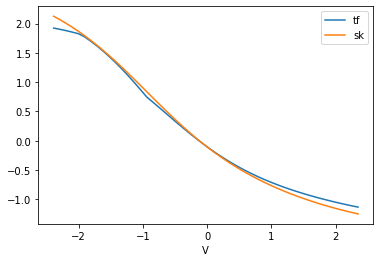

In [30]:
var=0 #Def. of which variables we would like to study 

x_var_range=np.linspace(min(X_train_sc[:,var]),max(X_train_sc[:,var]),50) #definition of the range we are interested in 
x_var_range_n = x_var_range

y_sens_tf=[]   
y_sens_sk=[] 
for i in range(0,len(x_var_range)):
     X_p=X0.copy()
     X_p[var] = x_var_range_n[i]
     y_p_tf = ann.predict(X_p.reshape(1,len(X_p))) #tensorflow-val
     y_p_sk = ne.predict([X_p]) #sklearn-el
     y_sens_tf.append(y_p_tf[0])
     y_sens_sk.append(y_p_sk[0])

    
plt.plot(x_var_range,y_sens_tf,label='tf')
plt.plot(x_var_range,y_sens_sk,label='sk')
plt.xlabel(df.columns[var+1])
plt.legend()
plt.show()

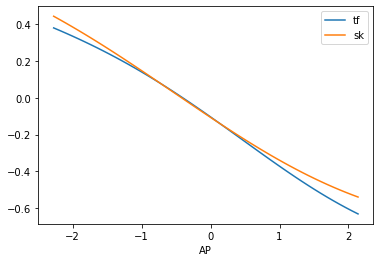

In [31]:
var=1 #Def. of which variables we would like to study 

x_var_range=np.linspace(min(X_train_sc[:,var]),max(X_train_sc[:,var]),50) #definition of the range we are interested in 
x_var_range_n = x_var_range

y_sens_tf=[]   
y_sens_sk=[] 
for i in range(0,len(x_var_range)):
     X_p=X0.copy()
     X_p[var] = x_var_range_n[i]
     y_p_tf = ann.predict(X_p.reshape(1,len(X_p)))
     y_p_sk = ne.predict([X_p])
     y_sens_tf.append(y_p_tf[0])
     y_sens_sk.append(y_p_sk[0])

    
plt.plot(x_var_range,y_sens_tf,label='tf')
plt.plot(x_var_range,y_sens_sk,label='sk')
plt.xlabel(df.columns[var+1])
plt.legend()
plt.show()

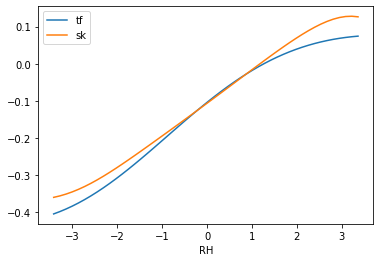

In [32]:
var=2 #Def. of which variables we would like to study 

x_var_range=np.linspace(min(X_train_sc[:,var]),max(X_train_sc[:,var]),50) #definition of the range we are interested in 
x_var_range_n = x_var_range

y_sens_tf=[]   
y_sens_sk=[] 
for i in range(0,len(x_var_range)):
     X_p=X0.copy()
     X_p[var] = x_var_range_n[i]
     y_p_tf = ann.predict(X_p.reshape(1,len(X_p)))
     y_p_sk = ne.predict([X_p])
     y_sens_tf.append(y_p_tf[0])
     y_sens_sk.append(y_p_sk[0])

    
plt.plot(x_var_range,y_sens_tf,label='tf')
plt.plot(x_var_range,y_sens_sk,label='sk')
plt.xlabel(df.columns[var+1])
plt.legend()
plt.show()